## <b> Evaluation Project 7 Census Income Prediction </b>
<b><em> By: Dnyanesh Nikam </em></b>

<b><em> Batch: DS2404 </em></b>

### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [89]:
census_income=pd.read_csv('census_income.csv')

df=census_income.copy()

In [90]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have multiple object features, need to encode them further down the line. Target is to predict Income class 

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Looks like we dont have any missing values

In [6]:
df.value_counts()

Age  Workclass         Fnlwgt  Education     Education_num  Marital_status      Occupation         Relationship   Race   Sex     Capital_gain  Capital_loss  Hours_per_week  Native_country  Income
25   Private           195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
23   Private           240137  5th-6th       3              Never-married       Handlers-cleaners  Not-in-family  White  Male    0             0             55              Mexico          <=50K     2
38   Private           207202  HS-grad       9              Married-civ-spouse  Machine-op-inspct  Husband        White  Male    0             0             48              United-States   >50K      2
30   Private           144593  HS-grad       9              Never-married       Other-service      Not-in-family  Black  Male    0             0             40              ?               <=50K     2


We have few'?' in data, lets check further

In [6]:
df['Native_country'].value_counts()

Native_country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

Looks like we have some 583 instances of '?'. Lets look further in all features for these '?' .

In [11]:
df['Age'].value_counts()

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

Looks like we dont have any '?' in Age feature

In [12]:
df['Workclass'].value_counts()

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

We have missing or unknown values in Workclass feature

In [13]:
df['Education'].value_counts()

Education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Lets replace '?' with Nan, so that we can check all features at once

In [7]:
df.replace('?', np.nan, inplace=True)

In [16]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
df['Workclass'].value_counts()

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [18]:
df['Workclass'] = df['Workclass'].str.strip()

In [19]:
df['Workclass'].replace('?', np.nan, inplace=True)

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\169227781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Workclass'].replace('?', np.nan, inplace=True)


In [20]:
print(df['Workclass'].isnull().sum())
print(df['Workclass'].value_counts(dropna=False))

1836
Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


It works, lets apply the same to all features using lambda

In [92]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  
df.replace('?', np.nan, inplace=True) 

In [93]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [94]:
df.isnull().sum()/len(df)*100

Age               0.000000
Workclass         5.638821
Fnlwgt            0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        5.660319
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    1.790541
Income            0.000000
dtype: float64

Less than 10% data is missing, we can drop the missing data to ensure integrity of remaining data

In [95]:
df.dropna(inplace=True)

In [96]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [97]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
30161/32560*100

92.63206388206389

We have dropped about 8 % data, which is less than 10 % it looks ok

In [30]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


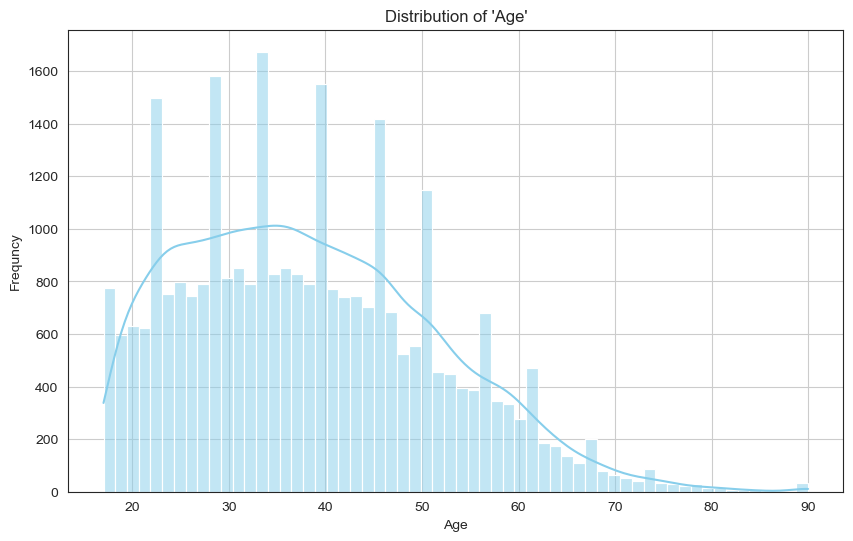

In [31]:
plt.figure(figsize=(10,6))

sns.histplot(df['Age'],kde=True,color='skyblue')
plt.title(f"Distribution of 'Age'")
plt.xlabel('Age')
plt.ylabel('Frequncy')
plt.grid(True)
plt.show()

Data is right skewed

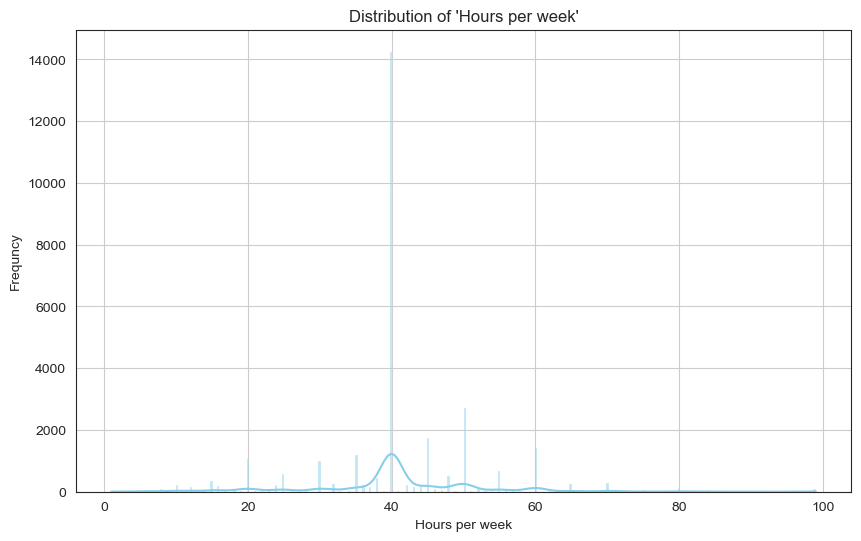

In [32]:
plt.figure(figsize=(10,6))

sns.histplot(df['Hours_per_week'],kde=True,color='skyblue')
plt.title(f"Distribution of 'Hours per week'")
plt.xlabel('Hours per week')
plt.ylabel('Frequncy')
plt.grid(True)
plt.show()

Looks like maximum people worked for 40 hours per week

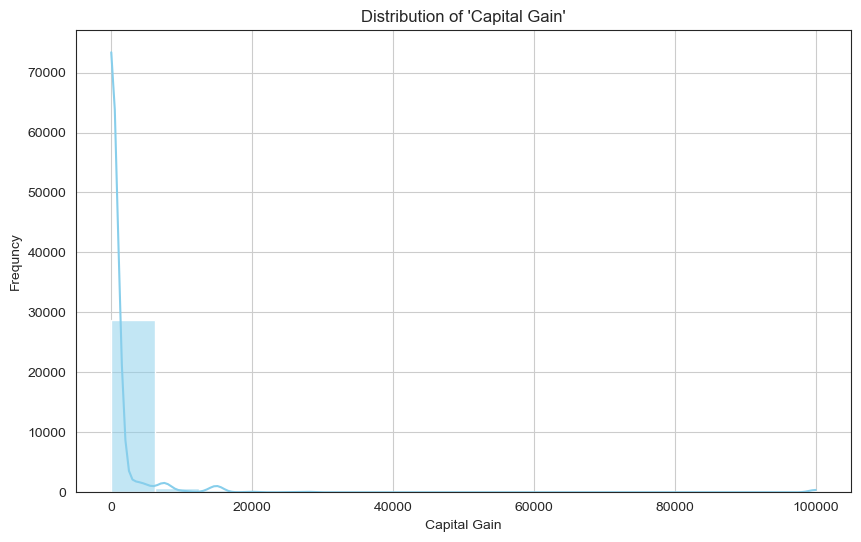

In [33]:
plt.figure(figsize=(10,6))

sns.histplot(df['Capital_gain'],kde=True,color='skyblue')
plt.title(f"Distribution of 'Capital Gain'")
plt.xlabel('Capital Gain')
plt.ylabel('Frequncy')
plt.grid(True)
plt.show()

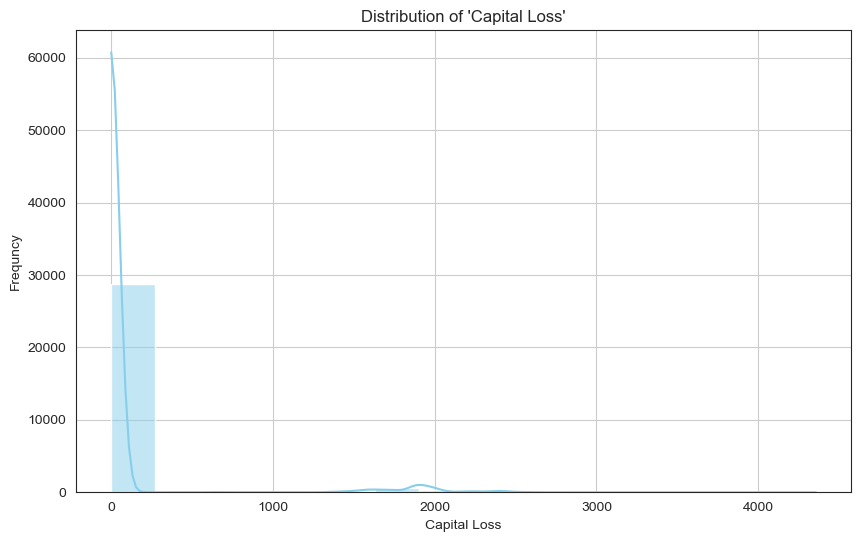

In [34]:
plt.figure(figsize=(10,6))

sns.histplot(df['Capital_loss'],kde=True,color='skyblue')
plt.title(f"Distribution of 'Capital Loss'")
plt.xlabel('Capital Loss')
plt.ylabel('Frequncy')
plt.grid(True)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30161 non-null  int64 
 1   Workclass       30161 non-null  object
 2   Fnlwgt          30161 non-null  int64 
 3   Education       30161 non-null  object
 4   Education_num   30161 non-null  int64 
 5   Marital_status  30161 non-null  object
 6   Occupation      30161 non-null  object
 7   Relationship    30161 non-null  object
 8   Race            30161 non-null  object
 9   Sex             30161 non-null  object
 10  Capital_gain    30161 non-null  int64 
 11  Capital_loss    30161 non-null  int64 
 12  Hours_per_week  30161 non-null  int64 
 13  Native_country  30161 non-null  object
 14  Income          30161 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\2530665118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Workclass',data=df,palette='pastel')


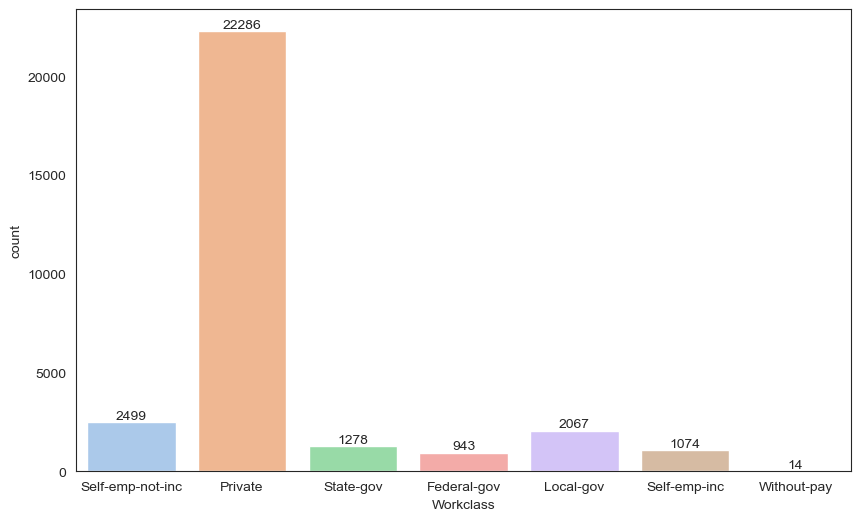

In [37]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x='Workclass',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

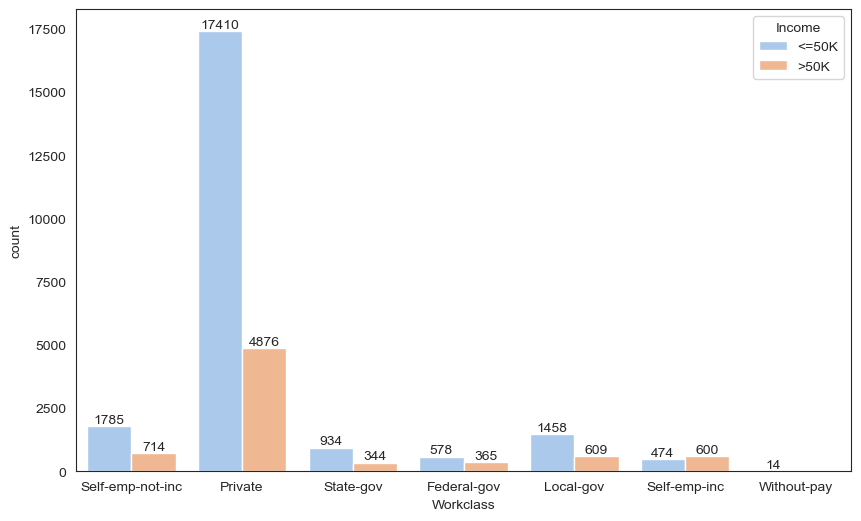

In [38]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x='Workclass',hue='Income',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Most of them are employed in Private sector

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\2199464137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Education',data=df,palette='pastel')


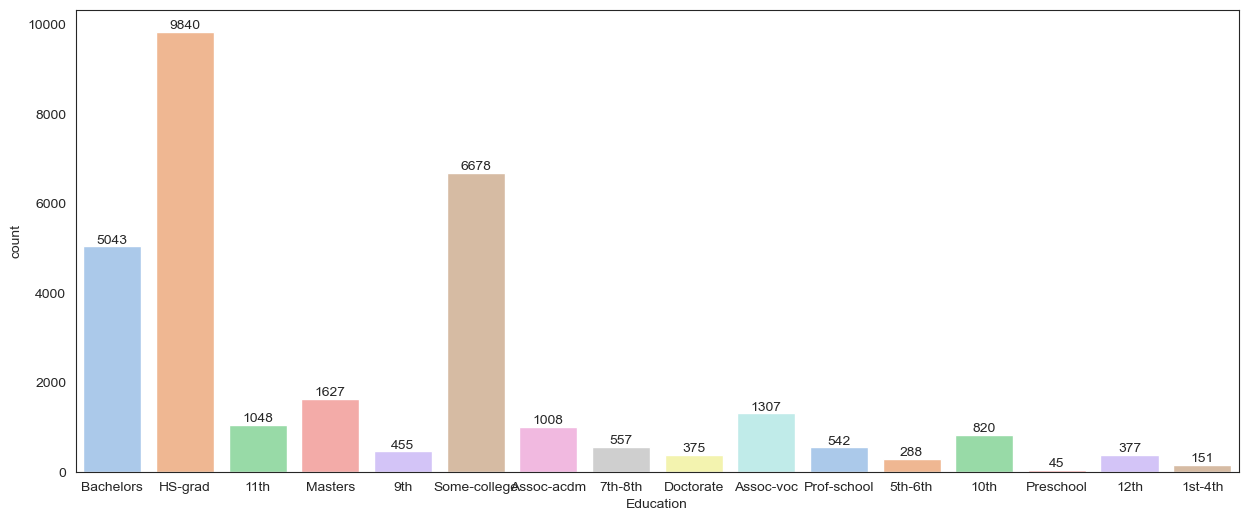

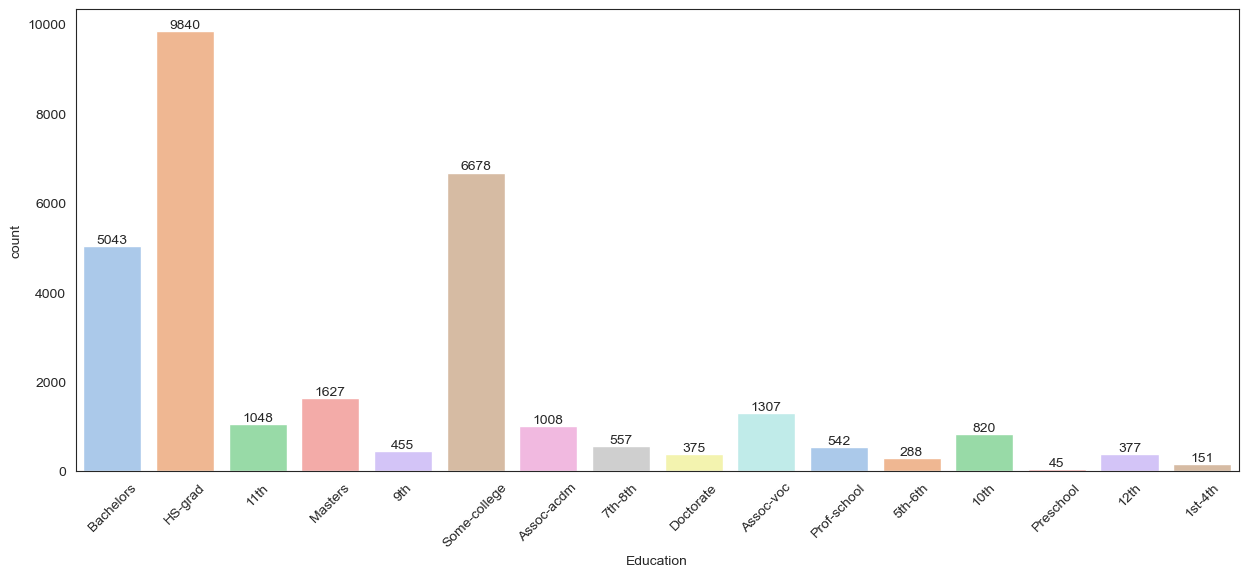

In [42]:
plt.figure(figsize=(15,6))
ax= sns.countplot(x='Education',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

Most of them have completed some sort of High school grduation

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\2943787769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Marital_status',data=df,palette='pastel')


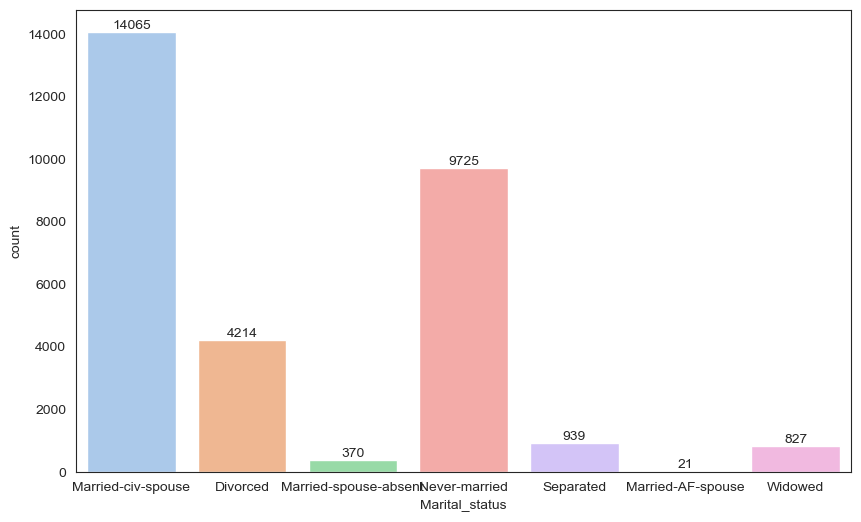

In [43]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x='Marital_status',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Most of them are married and living with spouse

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\3049701543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Occupation',data=df,palette='pastel')


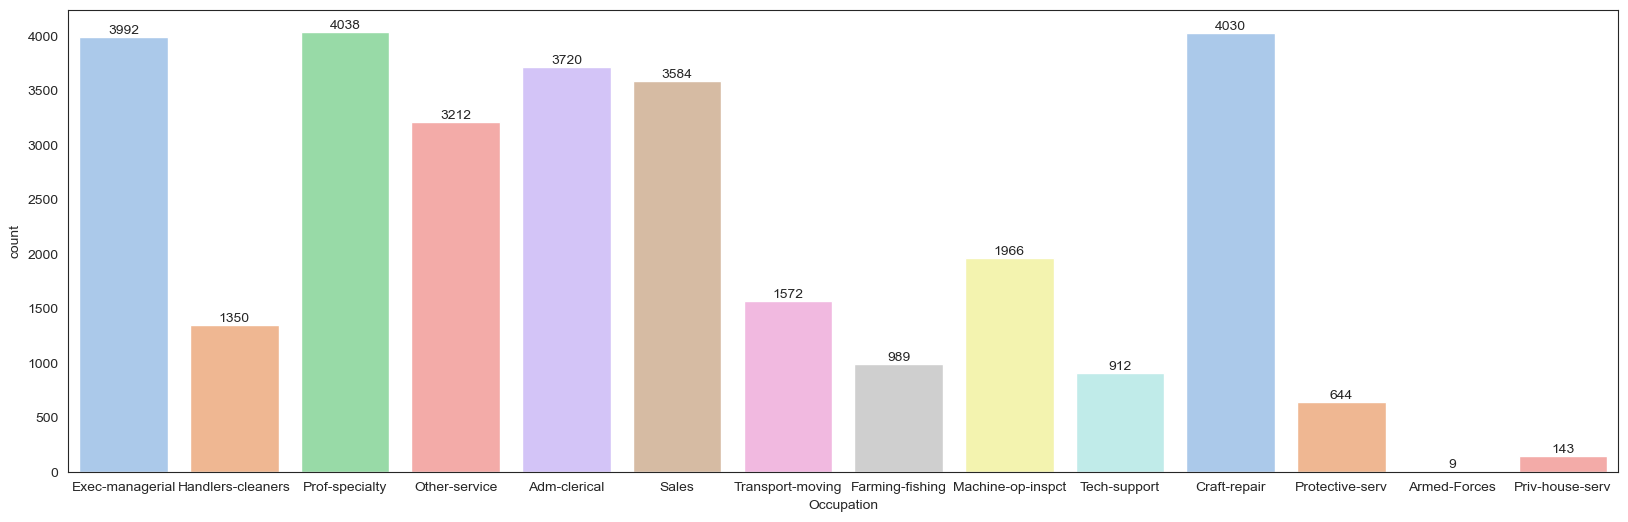

In [45]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x='Occupation',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

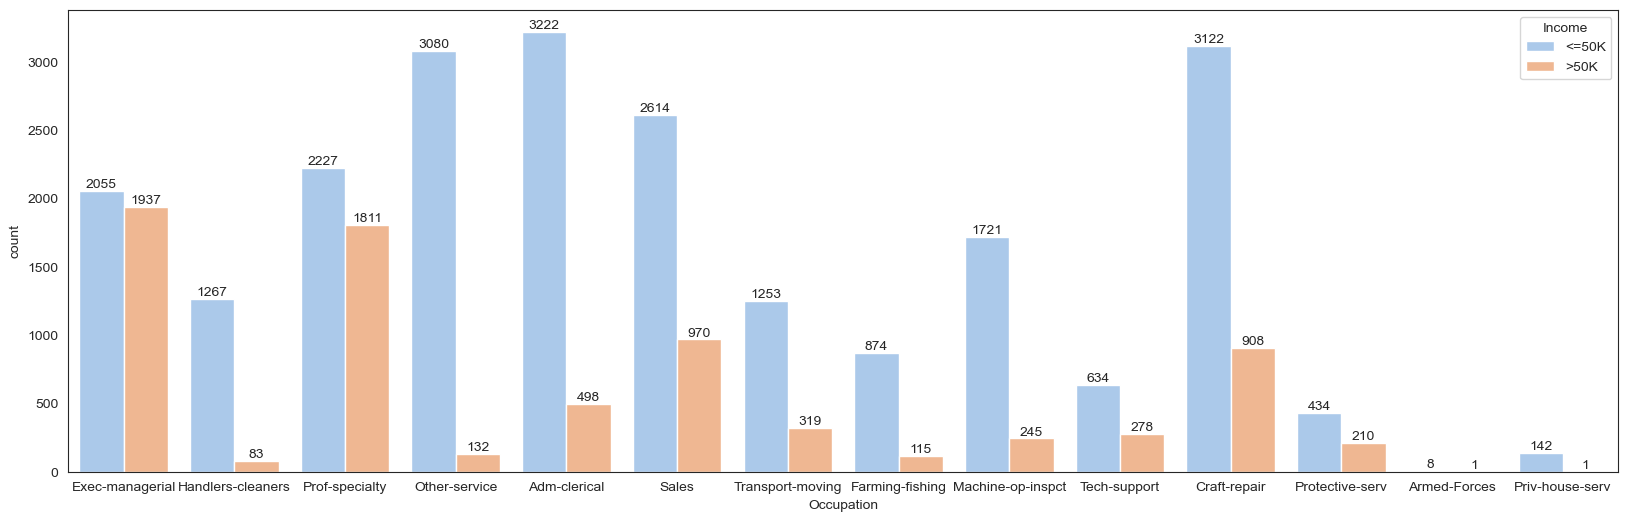

In [46]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x='Occupation',hue='Income',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\3443423778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Relationship',data=df,palette='pastel')


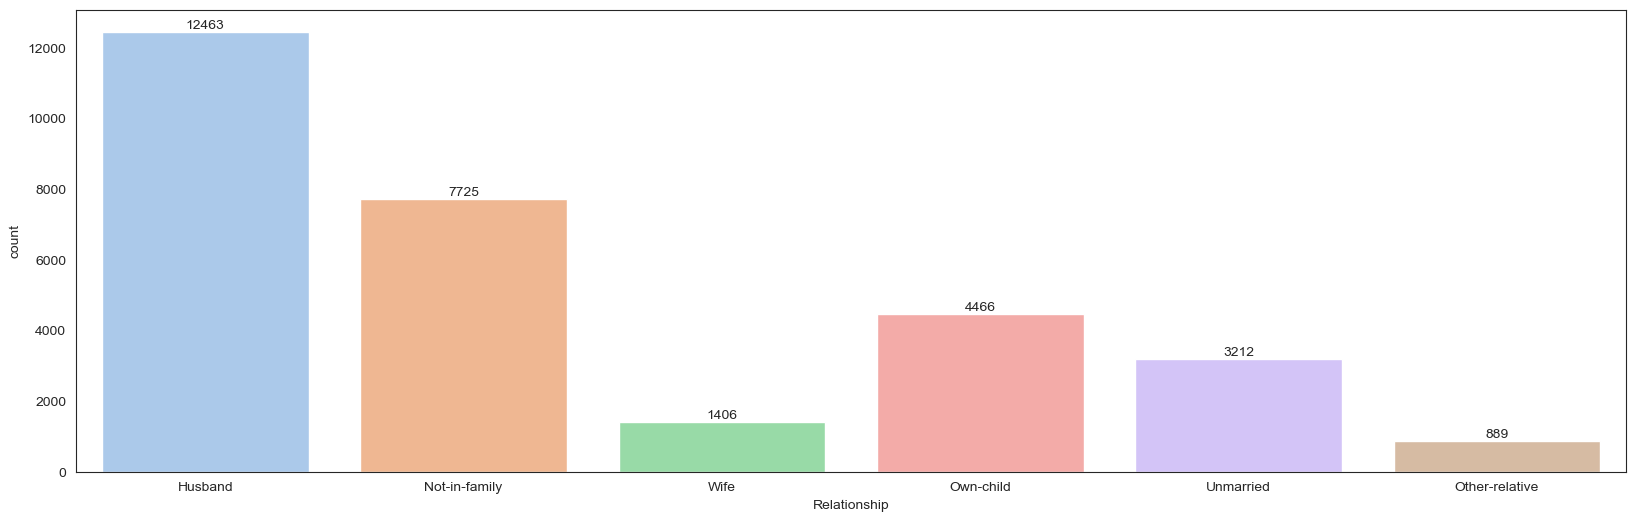

In [47]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x='Relationship',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\822877729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Race',data=df,palette='pastel')


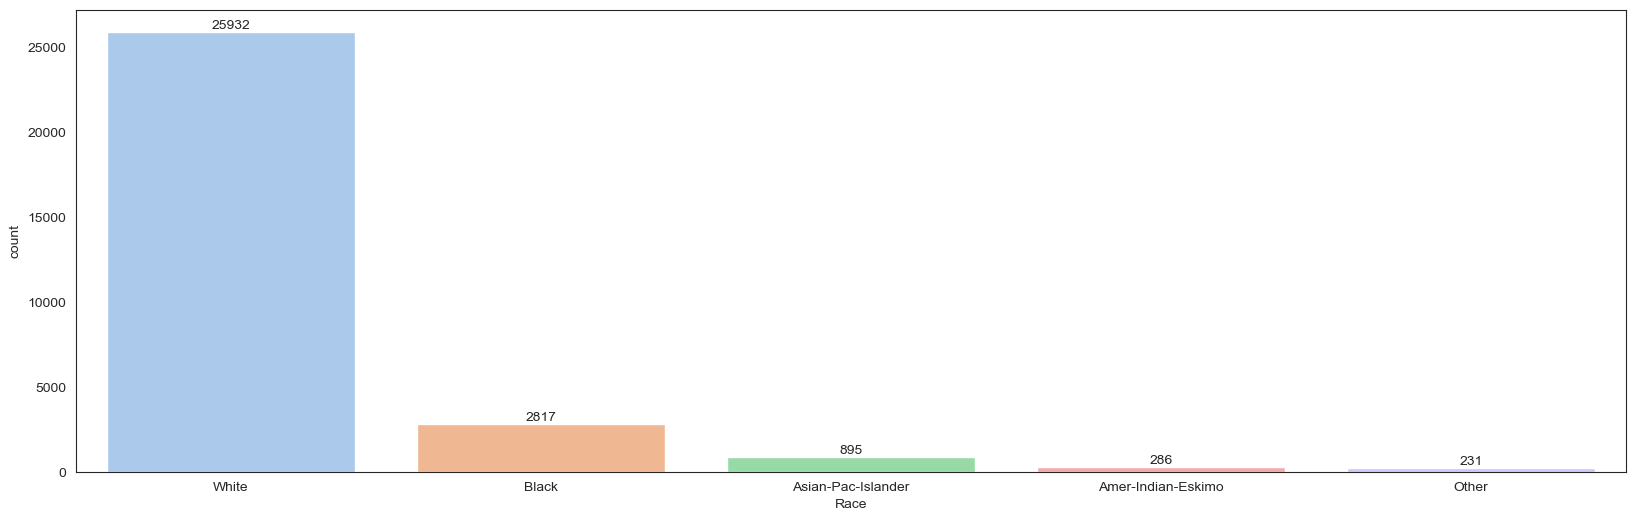

In [48]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x='Race',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\1823084131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Sex',data=df,palette='pastel')


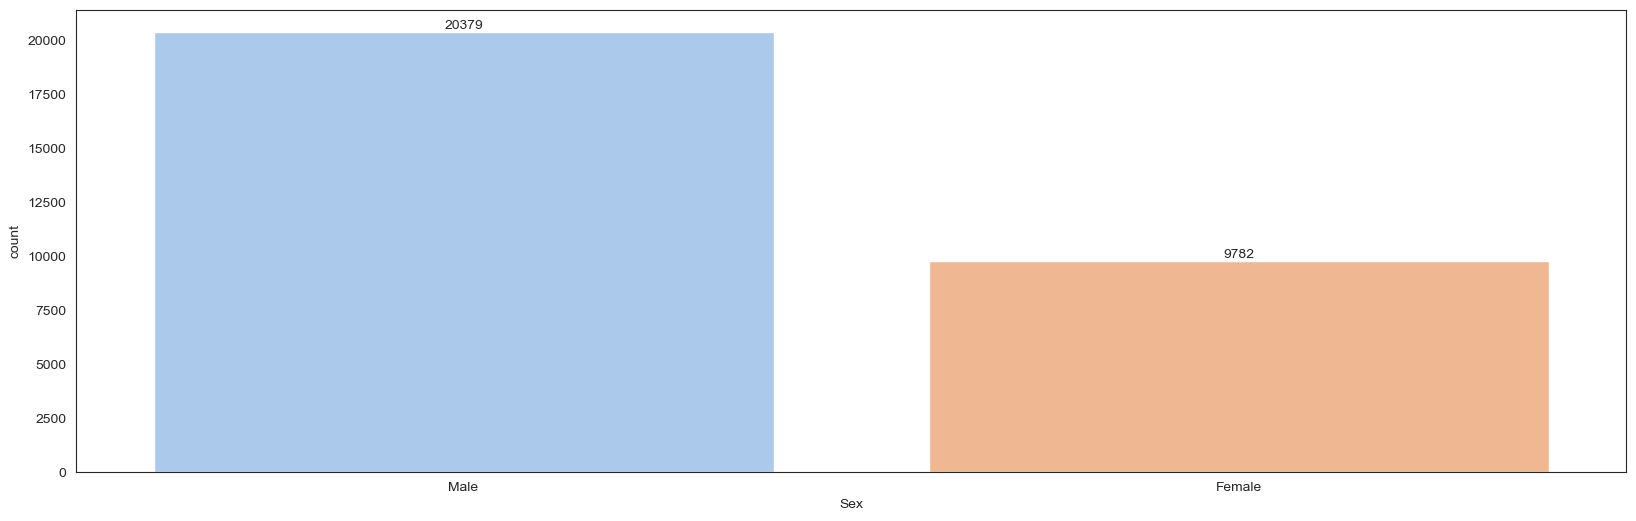

In [49]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x='Sex',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\2940224314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Native_country',data=df,palette='pastel')


<Figure size 2000x600 with 0 Axes>

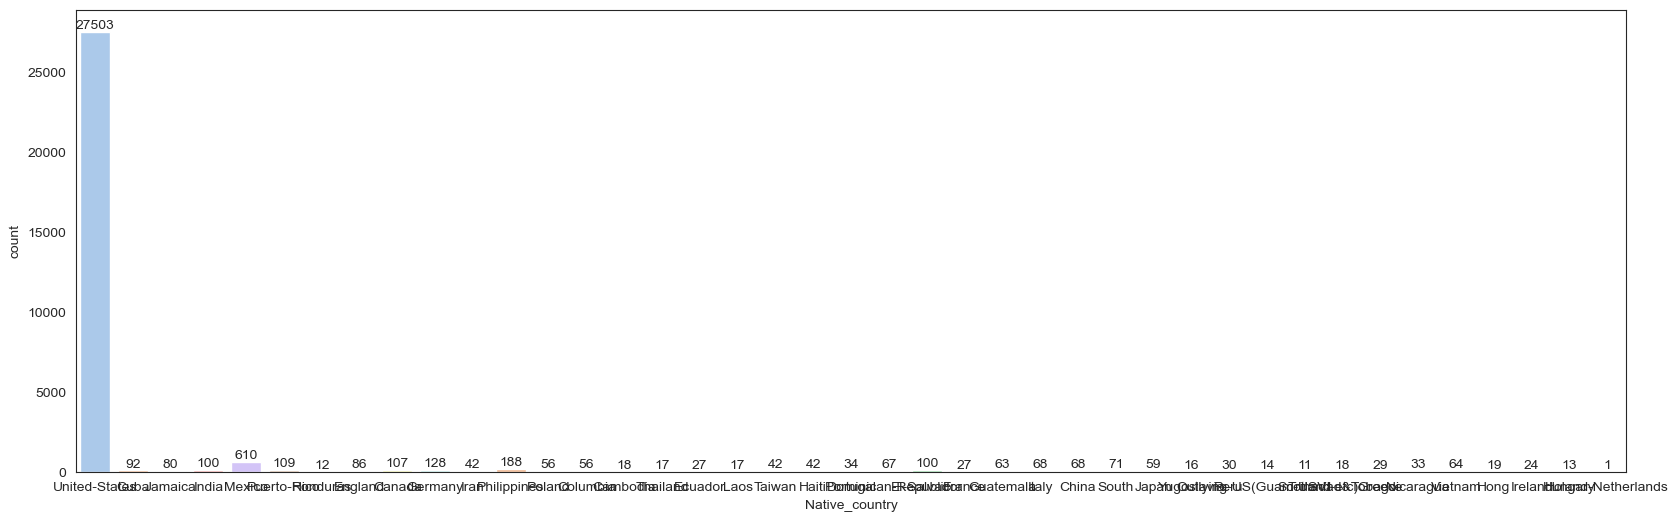

In [51]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x='Native_country',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

C:\Users\dnyan\AppData\Local\Temp\ipykernel_2924\671786139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='Income',data=df,palette='pastel')


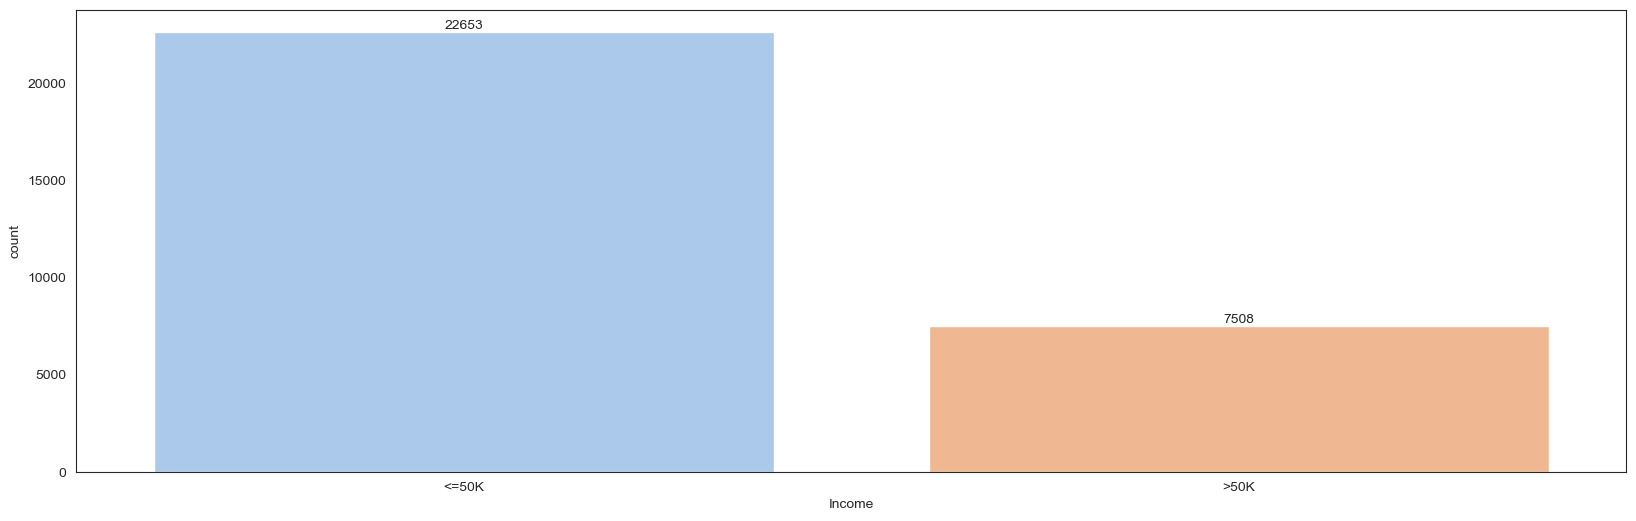

In [52]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x='Income',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30161 non-null  int64 
 1   Workclass       30161 non-null  object
 2   Fnlwgt          30161 non-null  int64 
 3   Education       30161 non-null  object
 4   Education_num   30161 non-null  int64 
 5   Marital_status  30161 non-null  object
 6   Occupation      30161 non-null  object
 7   Relationship    30161 non-null  object
 8   Race            30161 non-null  object
 9   Sex             30161 non-null  object
 10  Capital_gain    30161 non-null  int64 
 11  Capital_loss    30161 non-null  int64 
 12  Hours_per_week  30161 non-null  int64 
 13  Native_country  30161 non-null  object
 14  Income          30161 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [98]:
df['Income']=df['Income'].map({'<=50K':0,'>50K':1})

In [99]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [100]:
df['Education'].value_counts()

Education
HS-grad         9840
Some-college    6678
Bachelors       5043
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

In [101]:
df['Education']=df['Education'].map(
    {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-voc': 10,
    'Assoc-acdm': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15
})

In [102]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,12,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,8,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,12,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,13,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,11,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,8,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,8,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,8,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [103]:
df['Marital_status'].value_counts()

Marital_status
Married-civ-spouse       14065
Never-married             9725
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64

In [104]:
df['Marital_status']=df['Marital_status'].map({
    'Married-civ-spouse': 5,
    'Married-AF-spouse': 4,
    'Married-spouse-absent': 3,
    'Widowed': 2,
    'Divorced': 1,
    'Separated': 1,
    'Never-married': 0
})

In [74]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,12,13,5,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,8,9,1,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,6,7,5,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,12,13,5,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,13,14,5,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,11,12,5,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,8,9,5,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,8,9,2,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,8,9,0,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [105]:
df['Occupation'].value_counts()

Occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3720
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [106]:
df['Occupation']=df['Occupation'].map({
    'Prof-specialty': 12,
    'Exec-managerial': 11,
    'Craft-repair': 10,
    'Sales': 9,
    'Adm-clerical': 8,
    'Tech-support': 7,
    'Machine-op-inspct': 6,
    'Transport-moving': 5,
    'Protective-serv': 4,
    'Handlers-cleaners': 3,
    'Farming-fishing': 2,
    'Other-service': 1,
    'Priv-house-serv': 0,
    'Armed-Forces': 0
})

In [107]:
df['Relationship'].value_counts()

Relationship
Husband           12463
Not-in-family      7725
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: count, dtype: int64

In [108]:
df['Relationship']=df['Relationship'].map({
    'Husband': 5,
    'Wife': 4,
    'Own-child': 3,
    'Other-relative': 2,
    'Unmarried': 1,
    'Not-in-family': 0
})

In [79]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,12,13,5,11,5,White,Male,0,0,13,United-States,0
1,38,Private,215646,8,9,1,3,0,White,Male,0,0,40,United-States,0
2,53,Private,234721,6,7,5,3,5,Black,Male,0,0,40,United-States,0
3,28,Private,338409,12,13,5,12,4,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,13,14,5,11,4,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,11,12,5,7,4,White,Female,0,0,38,United-States,0
32556,40,Private,154374,8,9,5,6,5,White,Male,0,0,40,United-States,1
32557,58,Private,151910,8,9,2,8,1,White,Female,0,0,40,United-States,0
32558,22,Private,201490,8,9,0,8,3,White,Male,0,0,20,United-States,0


In [109]:
df['Race'].value_counts()

Race
White                 25932
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

In [110]:
df['Race']=df['Race'].map({
    'White': 4,
    'Black': 3,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 1,
    'Other': 0
})

In [111]:
df['Sex']=df['Sex'].map({'Male':1,'Female':0})

In [83]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,12,13,5,11,5,4,1,0,0,13,United-States,0
1,38,Private,215646,8,9,1,3,0,4,1,0,0,40,United-States,0
2,53,Private,234721,6,7,5,3,5,3,1,0,0,40,United-States,0
3,28,Private,338409,12,13,5,12,4,3,0,0,0,40,Cuba,0
4,37,Private,284582,13,14,5,11,4,4,0,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,11,12,5,7,4,4,0,0,0,38,United-States,0
32556,40,Private,154374,8,9,5,6,5,4,1,0,0,40,United-States,1
32557,58,Private,151910,8,9,2,8,1,4,0,0,0,40,United-States,0
32558,22,Private,201490,8,9,0,8,3,4,1,0,0,20,United-States,0


In [84]:
df['Workclass'].value_counts()

Workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1278
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

In [112]:
df['Workclass']=df['Workclass'].map({
    'Private': 6,
    'Self-emp-not-inc': 5,
    'Local-gov': 4,
    'State-gov': 3,
    'Self-emp-inc': 2,
    'Federal-gov': 1,
    'Without-pay': 0
})

In [108]:
df['Native_country'].value_counts()

Native_country
United-States                 27503
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

In [109]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,12,13,5,11,5,4,1,0,0,13,United-States,0
1,38,6,215646,8,9,1,3,0,4,1,0,0,40,United-States,0
2,53,6,234721,6,7,5,3,5,3,1,0,0,40,United-States,0
3,28,6,338409,12,13,5,12,4,3,0,0,0,40,Cuba,0
4,37,6,284582,13,14,5,11,4,4,0,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,6,257302,11,12,5,7,4,4,0,0,0,38,United-States,0
32556,40,6,154374,8,9,5,6,5,4,1,0,0,40,United-States,1
32557,58,6,151910,8,9,2,8,1,4,0,0,0,40,United-States,0
32558,22,6,201490,8,9,0,8,3,4,1,0,0,20,United-States,0


In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
encoder=LabelEncoder()

In [115]:
df['Native_country'] = encoder.fit_transform(df['Native_country'])

In [116]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,12,13,5,11,5,4,1,0,0,13,38,0
1,38,6,215646,8,9,1,3,0,4,1,0,0,40,38,0
2,53,6,234721,6,7,5,3,5,3,1,0,0,40,38,0
3,28,6,338409,12,13,5,12,4,3,0,0,0,40,4,0
4,37,6,284582,13,14,5,11,4,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,6,257302,11,12,5,7,4,4,0,0,0,38,38,0
32556,40,6,154374,8,9,5,6,5,4,1,0,0,40,38,1
32557,58,6,151910,8,9,2,8,1,4,0,0,0,40,38,0
32558,22,6,201490,8,9,0,8,3,4,1,0,0,20,38,0


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.401325,Age
1,1.064962,Workclass
2,1.015422,Fnlwgt
3,11930.911880,Education
4,14123.538484,Education_num
5,4.875678,Marital_status
6,1.285707,Occupation
7,4.231042,Relationship
8,1.042464,Race
9,1.306984,Sex


Dropping Education Num

In [118]:
df.drop(['Education_num'],axis=1,inplace=True)

In [119]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,12,5,11,5,4,1,0,0,13,38,0
1,38,6,215646,8,1,3,0,4,1,0,0,40,38,0
2,53,6,234721,6,5,3,5,3,1,0,0,40,38,0
3,28,6,338409,12,5,12,4,3,0,0,0,40,4,0
4,37,6,284582,13,5,11,4,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,6,257302,11,5,7,4,4,0,0,0,38,38,0
32556,40,6,154374,8,5,6,5,4,1,0,0,40,38,1
32557,58,6,151910,8,2,8,1,4,0,0,0,40,38,0
32558,22,6,201490,8,0,8,3,4,1,0,0,20,38,0


In [120]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,11.659347,Age
1,14.983269,Workclass
2,4.086799,Fnlwgt
3,17.142827,Education
4,10.744612,Marital_status
5,7.229584,Occupation
6,11.614165,Relationship
7,33.670609,Race
8,4.027949,Sex
9,1.084855,Capital_gain


In [121]:
Numeric=['Age', 'Capital_gain','Hours_per_week']

In [122]:
from scipy import stats
def count_outliers_zscore(df):
    outliers_count = {}
    for column in Numeric:
        z_scores = stats.zscore(df[column])
        outliers = ((z_scores > 3) | (z_scores < -3)).sum()
        outliers_count[column] = outliers
    return outliers_count

def count_outliers_iqr(df):
    outliers_count = {}
    for column in Numeric:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
        outliers_count[column] = outliers
    return outliers_count

outliers_zscore = count_outliers_zscore(df)
outliers_iqr = count_outliers_iqr(df)

outliers_df = pd.DataFrame({'Z-score outliers': outliers_zscore, 'IQR outliers': outliers_iqr})

print(outliers_df)

                Z-score outliers  IQR outliers
Age                          120           169
Capital_gain                 198          2537
Hours_per_week               402          7953


In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, BaggingClassifier)
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [124]:
X=df.drop(['Income'],axis=1)
y=df['Income']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=57)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=57),
    "Gradient Boosting": GradientBoostingClassifier(random_state=57),
    "AdaBoost": AdaBoostClassifier(random_state=57),
    "Bagging": BaggingClassifier(random_state=57),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=57),
    "Ridge Classifier": RidgeClassifier(class_weight='balanced', random_state=57),
    "Perceptron": Perceptron(class_weight='balanced', random_state=57),
    "Support Vector Machine": SVC(class_weight='balanced', random_state=57),
    "Linear SVM": LinearSVC(class_weight='balanced', random_state=57),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=57),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}


In [133]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 60)


Model: Random Forest
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6796
           1       0.75      0.62      0.68      2253

    accuracy                           0.86      9049
   macro avg       0.82      0.78      0.79      9049
weighted avg       0.85      0.86      0.85      9049

------------------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.8630
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6796
           1       0.79      0.61      0.69      2253

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049

------------------------------------------------------------


c:\Users\dnyan\.conda\envs\ml_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.8572
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6796
           1       0.77      0.60      0.68      2253

    accuracy                           0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049

------------------------------------------------------------
Model: Bagging
Accuracy: 0.8437
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6796
           1       0.73      0.60      0.65      2253

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.84      0.84      9049

------------------------------------------------------------
Model: Logistic Regression
Accuracy: 0.7936
Classification Report:
              precision    recall  f1-score   

Gradient Boosting works better than other models, checking further with class imbalance methods

In [56]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

Processing with imbalance handling: None (Balanced Class Weight)
Processing with imbalance handling: SMOTE
Processing with imbalance handling: ADASYN
Processing with imbalance handling: Random Under-Sampling
Processing with imbalance handling: SMOTE + Tomek
Processing with imbalance handling: SMOTEENN


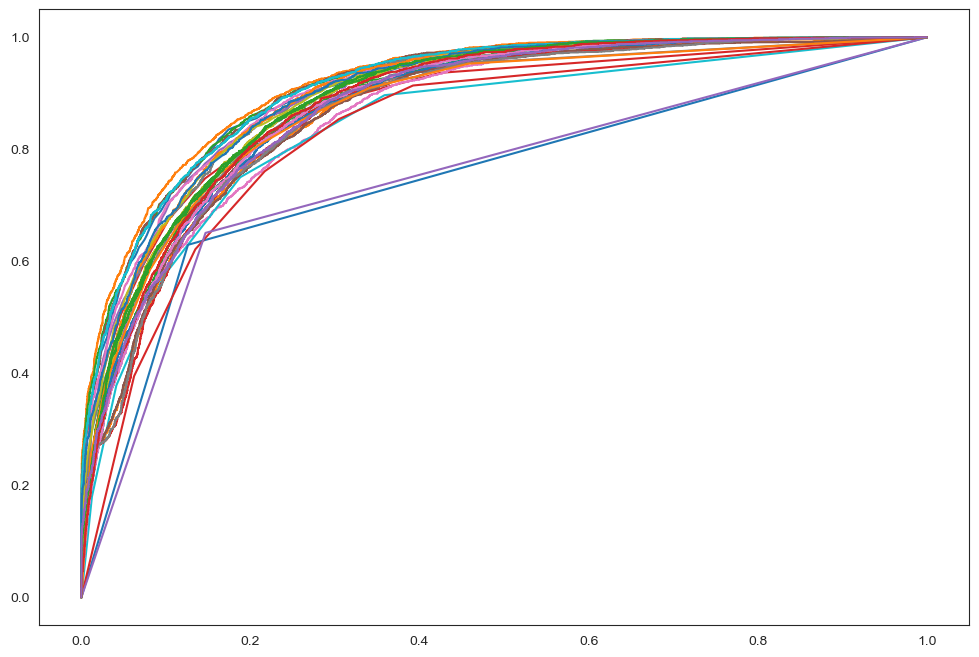

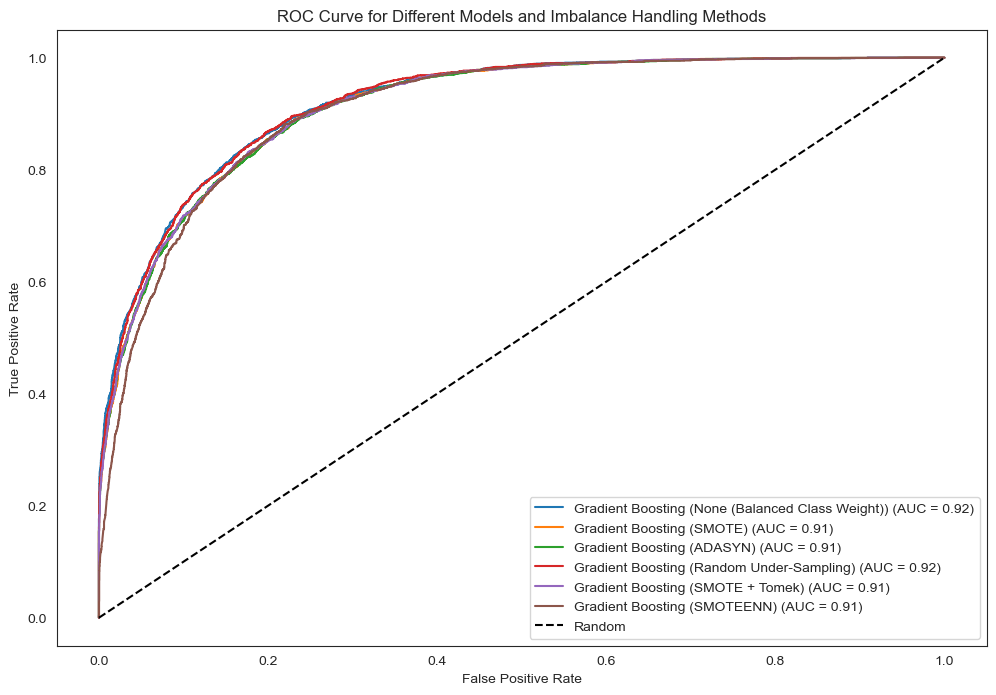

In [136]:
imbalance_methods = {
    "None (Balanced Class Weight)": None, 
    "SMOTE": SMOTE(random_state=47),
    "ADASYN": ADASYN(random_state=47),
    "Random Under-Sampling": RandomUnderSampler(random_state=47),
    "SMOTE + Tomek": SMOTETomek(random_state=47),
    "SMOTEENN": SMOTEENN(random_state=47)
}

models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=47),
}

plt.figure(figsize=(12, 8))

for imb_name, imb_method in imbalance_methods.items():
    print(f"Processing with imbalance handling: {imb_name}")
    
    if imb_method is not None:
        X_res, y_res = imb_method.fit_resample(X_train_scaled, y_train)
    else:
        X_res, y_res = X_train_scaled, y_train  
    
    for model_name, model in models.items():
        model.fit(X_res, y_res)  
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_prob = model.decision_function(X_test_scaled)
        
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label=f'{model_name} ({imb_name}) (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models and Imbalance Handling Methods')
plt.legend(loc='best')
plt.show()

All methods work almost similar

In [145]:
def find_best_random_state_with_adasyn(X, y, n_splits=5, n_trials=10):
    best_roc_auc_score = -np.inf
    best_train_test_random_state = None
    best_gbdt_random_state = None
    
    for train_test_random_state in range(n_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.3, 
                                                            random_state=train_test_random_state,
                                                            stratify=y)
    
        adsyn = ADASYN(random_state=train_test_random_state)
        X_train_adsyn, y_train_adsyn = adsyn.fit_resample(X_train, y_train)

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train_adsyn)
        X_test_scaled = scaler.transform(X_test)
        
        for gbdt_random_state in range(n_trials):
            gbdt = GradientBoostingClassifier(random_state=gbdt_random_state)
            gbdt.fit(X_train_scaled, y_train_adsyn)
            
            y_pred_proba = gbdt.predict_proba(X_test_scaled)[:, 1]
            current_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
            
            if current_roc_auc_score > best_roc_auc_score:
                best_roc_auc_score = current_roc_auc_score
                best_train_test_random_state = train_test_random_state
                best_gbdt_random_state = gbdt_random_state

    return best_train_test_random_state, best_gbdt_random_state, best_roc_auc_score

best_train_test_random_state, best_gbdt_random_state, best_roc_auc_score = find_best_random_state_with_adasyn(X, y)

print(f"Best Train-Test Random State: {best_train_test_random_state}")
print(f"Best GBDT Random State: {best_gbdt_random_state}")
print(f"Best ROC AUC Score: {best_roc_auc_score:.4f}")


Best Train-Test Random State: 1
Best GBDT Random State: 3
Best ROC AUC Score: 0.9118


In [138]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

adsyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy='minority')
X_train_adsyn, y_train_adsyn = adsyn.fit_resample(X_train_scaled, y_train)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gbdt = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_adsyn, y_train_adsyn)

best_gbdt = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_gbdt.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


y_prob = best_gbdt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best GBDT')
plt.legend(loc='best')
plt.show()


def metric_score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_train_pred = model.predict(X_train)
        print(f"Train Accuracy: {np.mean(y_train_pred == y_train):.4f}")
    else:
        y_test_pred = model.predict(X_test)
        print(f"Test Accuracy: {np.mean(y_test_pred == y_test):.4f}")

metric_score(best_gbdt, X_train_adsyn, X_test_scaled, y_train_adsyn, y_test, train=True)
metric_score(best_gbdt, X_train_adsyn, X_test_scaled, y_train_adsyn, y_test, train=False)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


KeyboardInterrupt: 

Model taking longer to train, tuning with Randomized Search CV

In [139]:
from sklearn.model_selection import RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      6796
           1       0.66      0.78      0.71      2253

    accuracy                           0.84      9049
   macro avg       0.79      0.82      0.80      9049
weighted avg       0.86      0.84      0.85      9049



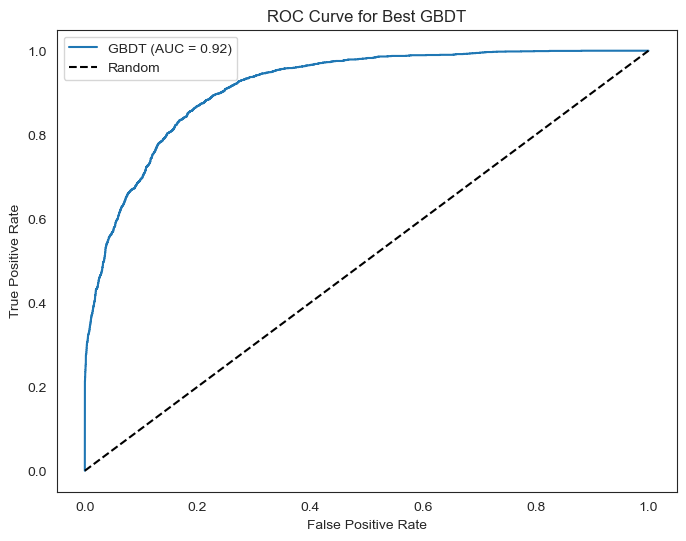

Train Accuracy: 0.9109
Test Accuracy: 0.8436


In [144]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

adsyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy='minority')
X_train_adsyn, y_train_adsyn = adsyn.fit_resample(X_train_scaled, y_train)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gbdt = GradientBoostingClassifier(random_state=42)
grid_search = RandomizedSearchCV(estimator=gbdt, param_distributions=param_grid,  scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_adsyn, y_train_adsyn)

best_gbdt = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_gbdt.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


y_prob = best_gbdt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GBDT (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best GBDT')
plt.legend(loc='best')
plt.show()


def metric_score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_train_pred = model.predict(X_train)
        print(f"Train Accuracy: {np.mean(y_train_pred == y_train):.4f}")
    else:
        y_test_pred = model.predict(X_test)
        print(f"Test Accuracy: {np.mean(y_test_pred == y_test):.4f}")

metric_score(best_gbdt, X_train_adsyn, X_test_scaled, y_train_adsyn, y_test, train=True)
metric_score(best_gbdt, X_train_adsyn, X_test_scaled, y_train_adsyn, y_test, train=False)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1}

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      6796
           1       0.65      0.80      0.72      2253

    accuracy                           0.84      9049
   macro avg       0.79      0.83      0.80      9049
weighted avg       0.86      0.84      0.85      9049



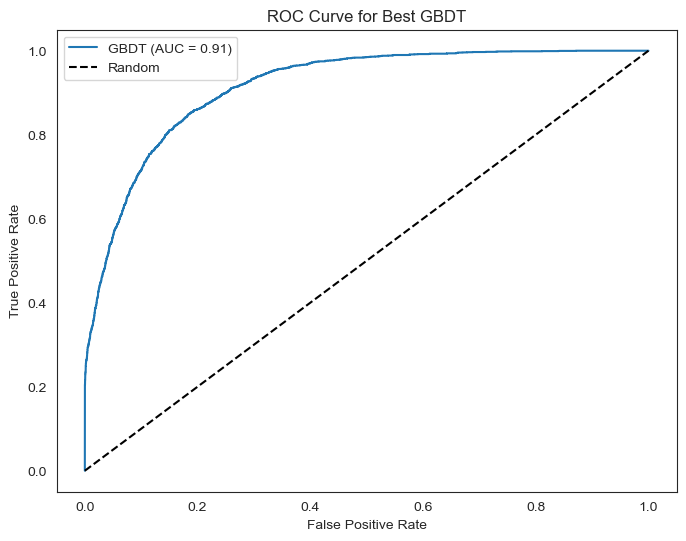

Train Accuracy: 0.8917
Test Accuracy: 0.8416


In [147]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = adsyn.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gbdt = GradientBoostingClassifier(random_state=42)
grid_search = RandomizedSearchCV(estimator=gbdt, param_distributions=param_grid,  scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train_rus)

best_gbdt = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_gbdt.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


y_prob = best_gbdt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GBDT (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best GBDT')
plt.legend(loc='best')
plt.show()


def metric_score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_train_pred = model.predict(X_train)
        print(f"Train Accuracy: {np.mean(y_train_pred == y_train):.4f}")
    else:
        y_test_pred = model.predict(X_test)
        print(f"Test Accuracy: {np.mean(y_test_pred == y_test):.4f}")

metric_score(best_gbdt, X_train_scaled, X_test_scaled, y_train_rus, y_test, train=True)
metric_score(best_gbdt, X_train_scaled, X_test_scaled, y_train_rus, y_test, train=False)


Creating New Fetaures

In [126]:
def age_group(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

df['Age_group'] = df['Age'].apply(age_group)


In [127]:
def education_level(edu):
    if edu in ['Masters', 'Doctorate']:
        return 'Postgraduate'
    elif edu in ['Bachelors', 'Assoc-acdm']:
        return 'Undergraduate'
    elif edu in ['HS-grad', 'Some-college']:
        return 'High School or Some College'
    else:
        return 'Less than High School'

df['Education_level'] = df['Education'].apply(education_level)


In [128]:
df['Experience'] = df['Age'] - (df['Education'] + 5)
df['Experience'] = df['Experience'].apply(lambda x: max(x, 0))


In [129]:
df['Capital_gain_loss_ratio'] = df['Capital_gain'] / (df['Capital_loss'] + 1)

In [130]:
df['Total_Capital'] = df['Capital_gain'] - df['Capital_loss']


In [131]:
def hours_category(hours):
    if hours <= 20:
        return 'Part-time'
    elif hours <= 40:
        return 'Full-time'
    else:
        return 'Overtime'

df['Hours_category'] = df['Hours_per_week'].apply(hours_category)


In [132]:
country_counts = df['Native_country'].value_counts()
df['Rare_country'] = df['Native_country'].apply(lambda x: 1 if country_counts[x] < 100 else 0)


In [133]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Hours_per_week,Native_country,Income,Age_group,Education_level,Experience,Capital_gain_loss_ratio,Total_Capital,Hours_category,Rare_country
0,50,5,83311,12,5,11,5,4,1,0,...,13,38,0,45-54,Less than High School,33,0.0,0,Part-time,0
1,38,6,215646,8,1,3,0,4,1,0,...,40,38,0,35-44,Less than High School,25,0.0,0,Full-time,0
2,53,6,234721,6,5,3,5,3,1,0,...,40,38,0,45-54,Less than High School,42,0.0,0,Full-time,0
3,28,6,338409,12,5,12,4,3,0,0,...,40,4,0,25-34,Less than High School,11,0.0,0,Full-time,1
4,37,6,284582,13,5,11,4,4,0,0,...,40,38,0,35-44,Less than High School,19,0.0,0,Full-time,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,6,257302,11,5,7,4,4,0,0,...,38,38,0,25-34,Less than High School,11,0.0,0,Full-time,0
32556,40,6,154374,8,5,6,5,4,1,0,...,40,38,1,35-44,Less than High School,27,0.0,0,Full-time,0
32557,58,6,151910,8,2,8,1,4,0,0,...,40,38,0,55-64,Less than High School,45,0.0,0,Full-time,0
32558,22,6,201490,8,0,8,3,4,1,0,...,20,38,0,18-24,Less than High School,9,0.0,0,Part-time,0


In [134]:
hours_category_mapping = {'Part-time': 0, 'Full-time': 1, 'Overtime': 2}
df['Hours_category'] = df['Hours_category'].map(hours_category_mapping)

education_level_mapping = {
    'Postgraduate': 0,
    'Undergraduate': 1,
    'High School or Some College': 2,
    'Less than High School': 3
}
df['Education_level'] = df['Education_level'].map(education_level_mapping)


In [135]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Hours_per_week,Native_country,Income,Age_group,Education_level,Experience,Capital_gain_loss_ratio,Total_Capital,Hours_category,Rare_country
0,50,5,83311,12,5,11,5,4,1,0,...,13,38,0,45-54,3,33,0.0,0,0,0
1,38,6,215646,8,1,3,0,4,1,0,...,40,38,0,35-44,3,25,0.0,0,1,0
2,53,6,234721,6,5,3,5,3,1,0,...,40,38,0,45-54,3,42,0.0,0,1,0
3,28,6,338409,12,5,12,4,3,0,0,...,40,4,0,25-34,3,11,0.0,0,1,1
4,37,6,284582,13,5,11,4,4,0,0,...,40,38,0,35-44,3,19,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,6,257302,11,5,7,4,4,0,0,...,38,38,0,25-34,3,11,0.0,0,1,0
32556,40,6,154374,8,5,6,5,4,1,0,...,40,38,1,35-44,3,27,0.0,0,1,0
32557,58,6,151910,8,2,8,1,4,0,0,...,40,38,0,55-64,3,45,0.0,0,1,0
32558,22,6,201490,8,0,8,3,4,1,0,...,20,38,0,18-24,3,9,0.0,0,0,0


In [136]:
encoder = LabelEncoder()
df['Age_group'] = encoder.fit_transform(df['Age_group'])

In [137]:
X=df.drop(['Income'],axis=1)
y=df['Income']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: Random Forest
Accuracy: 0.8548
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6796
           1       0.75      0.63      0.68      2253

    accuracy                           0.85      9049
   macro avg       0.82      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049

------------------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.8624
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6796
           1       0.79      0.61      0.69      2253

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049

------------------------------------------------------------


c:\Users\dnyan\.conda\envs\ml_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.8576
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6796
           1       0.78      0.60      0.68      2253

    accuracy                           0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049

------------------------------------------------------------
Model: Bagging
Accuracy: 0.8424
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6796
           1       0.72      0.59      0.65      2253

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.77      9049
weighted avg       0.84      0.84      0.84      9049

------------------------------------------------------------
Model: Logistic Regression
Accuracy: 0.7964
Classification Report:
              precision    recall  f1-score   

c:\Users\dnyan\.conda\envs\ml_env\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [63]:
def find_best_random_state_with_adasyn(X, y, n_splits=5, n_trials=10):
    best_roc_auc_score = -np.inf
    best_train_test_random_state = None
    best_gbdt_random_state = None
    
    for train_test_random_state in range(n_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.3, 
                                                            random_state=train_test_random_state,
                                                            stratify=y)

        adsyn = ADASYN(random_state=train_test_random_state)
        X_train_adsyn, y_train_adsyn = adsyn.fit_resample(X_train, y_train)

        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train_adsyn)
        X_test_scaled = scaler.transform(X_test)
        
        for gbdt_random_state in range(n_trials):
            gbdt = GradientBoostingClassifier(random_state=gbdt_random_state)
            gbdt.fit(X_train_scaled, y_train_adsyn)
            
            y_pred_proba = gbdt.predict_proba(X_test_scaled)[:, 1]
            current_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

            if current_roc_auc_score > best_roc_auc_score:
                best_roc_auc_score = current_roc_auc_score
                best_train_test_random_state = train_test_random_state
                best_gbdt_random_state = gbdt_random_state

    return best_train_test_random_state, best_gbdt_random_state, best_roc_auc_score

best_train_test_random_state, best_gbdt_random_state, best_roc_auc_score = find_best_random_state_with_adasyn(X, y)

print(f"Best Train-Test Random State: {best_train_test_random_state}")
print(f"Best GBDT Random State: {best_gbdt_random_state}")
print(f"Best ROC AUC Score: {best_roc_auc_score:.4f}")


Best Train-Test Random State: 1
Best GBDT Random State: 4
Best ROC AUC Score: 0.9145


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.1}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6796
           1       0.61      0.86      0.72      2253

    accuracy                           0.83      9049
   macro avg       0.78      0.84      0.80      9049
weighted avg       0.86      0.83      0.84      9049



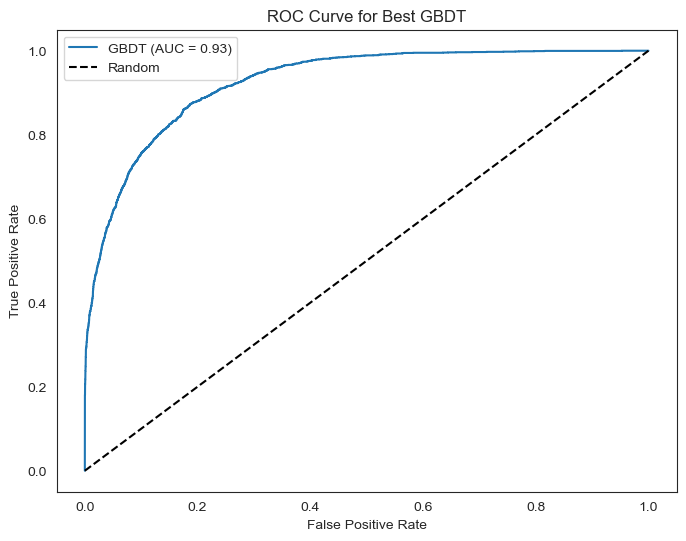

Train Accuracy: 0.8729
Test Accuracy: 0.8297


In [139]:
rus = RandomUnderSampler(random_state=1)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gbdt = GradientBoostingClassifier(random_state=4)
grid_search = RandomizedSearchCV(estimator=gbdt, param_distributions=param_grid,  scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train_rus)

best_gbdt = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_gbdt.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


y_prob = best_gbdt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GBDT (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best GBDT')
plt.legend(loc='best')
plt.show()


def metric_score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_train_pred = model.predict(X_train)
        print(f"Train Accuracy: {np.mean(y_train_pred == y_train):.4f}")
    else:
        y_test_pred = model.predict(X_test)
        print(f"Test Accuracy: {np.mean(y_test_pred == y_test):.4f}")

metric_score(best_gbdt, X_train_scaled, X_test_scaled, y_train_rus, y_test, train=True)
metric_score(best_gbdt, X_train_scaled, X_test_scaled, y_train_rus, y_test, train=False)

In [149]:
import joblib

joblib.dump(best_gbdt, 'Census_Income_GBDT_model.pkl')

['Census_Income_GBDT_model.pkl']

### Final Model for Income Prediction:
The **Gradient Boosting Classifier** was chosen as the final model for predicting whether an individual's income exceeds $50K. This decision was made after performing hyperparameter tuning to optimize model performance.

- **Best Hyperparameters**:
  - Subsample: 1.0
  - N_estimators: 300
  - Min Samples Split: 5
  - Min Samples Leaf: 4
  - Max Features: 'log2'
  - Max Depth: 4
  - Learning Rate: 0.1

---

### Model Performance:
- **Classification Report**:
  - **Class 0 (Income ≤ $50K)**:
    - Precision: 0.95
    - Recall: 0.82
    - F1-Score: 0.88
  - **Class 1 (Income > $50K)**:
    - Precision: 0.61
    - Recall: 0.86
    - F1-Score: 0.72
  - **Overall Accuracy**:
    - Train Accuracy: 87.29%
    - Test Accuracy: 82.97%

  The model shows a high precision for predicting people with income less than or equal to $50K (Class 0) and a strong recall for identifying those who earn more than $50K (Class 1). This combination ensures that the model is effective at correctly identifying higher-income individuals, which is critical in this prediction task.

---

### Basis for Selecting the Final Model:
The **Gradient Boosting Classifier** was selected for the following reasons:
1. **High Recall for Class 1 (Income > $50K)**: 
   - The model's **recall of 0.86** for individuals making over $50K means it can correctly identify a high percentage of people earning above that threshold. Since the main objective is to predict higher income, recall for this class is crucial.
   
2. **Balanced Precision and Recall**:
   - Although the precision for predicting income > $50K is moderate at 0.61, the high recall ensures that the model captures most of the high-income individuals, and the F1 score of 0.72 demonstrates a balanced trade-off between precision and recall.

3. **Overall Accuracy**:
   - The model has an **accuracy of 82.97%** on the test set, indicating that it generalizes well to unseen data while maintaining good predictive performance for both income classes.

---